In [76]:
from __future__ import division
import warnings
import seaborn as sns
from pprint import pprint

warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set_style("whitegrid")
sns.set_context("poster")

from pylab import rcParams
rcParams['figure.figsize'] = 20,5

%matplotlib inline

In [77]:
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_hdf('../data/data_w_descs_and_census.h5')

In [3]:
df.shape

(905650, 154)

In [48]:
df['is_y_null'] = df.CLOSED_DT.apply(lambda x: 1 if type(x) == pd.tslib.NaTType else 0)

In [33]:
df.head(1).T

,0
CASE_ENQUIRY_ID,101000958209
OPEN_DT,2013-11-01 09:27:19
TARGET_DT,2013-11-15 09:27:19
CLOSED_DT,2013-11-27 10:15:45
OnTime_Status,OVERDUE
CASE_STATUS,Closed
CLOSURE_REASON,Case Closed Case Resolved
CASE_TITLE,Sign Repair
SUBJECT,Transportation - Traffic Division
REASON,Signs & Signals


## Wht % of rows in the entire dataset have `y` NAs?

In [8]:
df.CLOSED_DT.isnull().sum() / df.shape[0]

0.077992601998564573

In [87]:
def get_pct_unresolved(df):
    assert type(df) == pd.Series
    assert df.name == 'CLOSED_DT'
    return df.isnull().sum() / df.shape[0]

In [88]:
get_pct_unresolved(df.CLOSED_DT)

0.077992601998564573

Around 8% are nulls.

## How does this differ over time?

In [11]:
df['OPEN_DT_year_month'] = df.OPEN_DT.map(lambda x: x.strftime('%Y-%m'))

In [57]:
def pct_nulls(lst):
    aa = lst.sum()
    bb = len(lst)
    return aa / bb

In [105]:
df_is_y_null = df[['OPEN_DT_year_month', 'is_y_null']].groupby('OPEN_DT_year_month').agg(pct_nulls)
df_is_y_null.head()

,is_y_null
OPEN_DT_year_month,
2011-07,0.069177
2011-08,0.038508
2011-09,0.061123
2011-10,0.072093
2011-11,0.069064


In [106]:
df_is_y_null

,is_y_null
OPEN_DT_year_month,
2011-07,0.069177
2011-08,0.038508
2011-09,0.061123
2011-10,0.072093
2011-11,0.069064
2011-12,0.081175
2012-01,0.080087
2012-02,0.060658
2012-03,0.043566


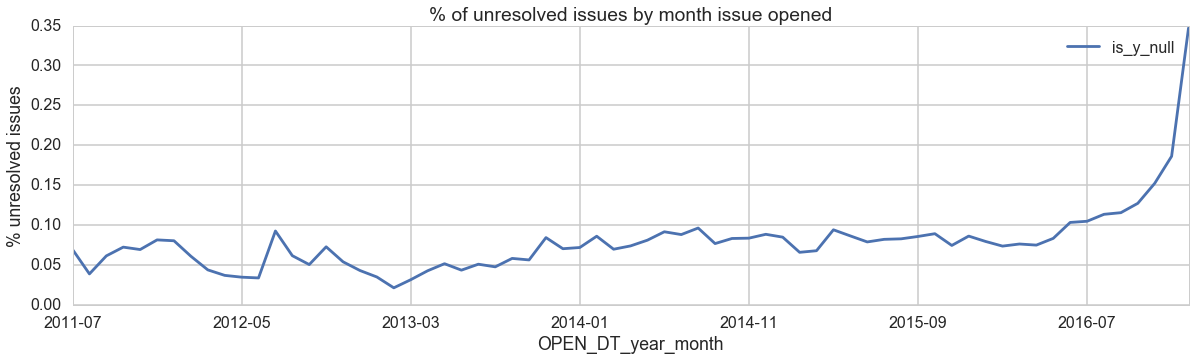

In [70]:
ax = df_is_y_null.plot(figsize=(20,5))
ax.set_ylabel('% unresolved issues')
ax.set_title('% of unresolved issues by month issue opened');

It looks like the ~7% of issues that are unersolved has remained constant throughout time.

## Removing Dec '16 onward

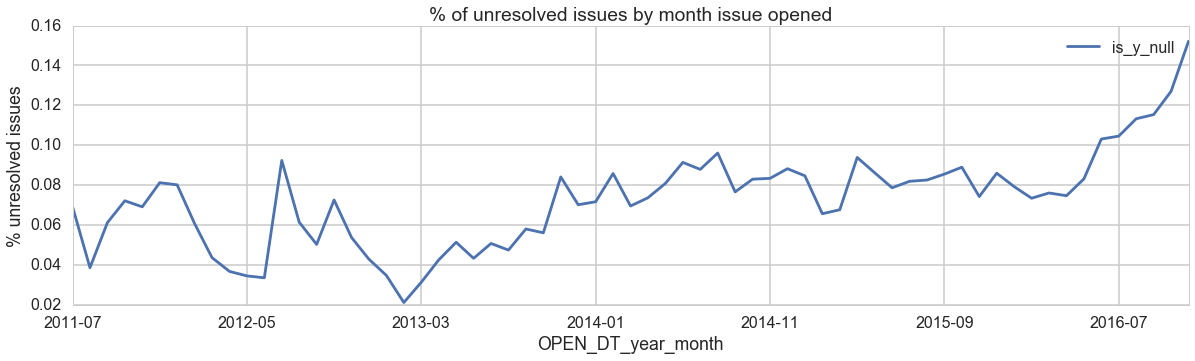

In [75]:
ax = df_is_y_null.drop(['2016-12', '2017-01'], axis=0).plot(figsize=(20,5))
ax.set_ylabel('% unresolved issues')
ax.set_title('% of unresolved issues by month issue opened');

It makes sense intuitively that the more recent issues are more likely to be unresolved.

## For Generic Animal Request for 2016, what % of issues are unresolved?

In [103]:
get_pct_unresolved(
    df[df.OPEN_DT > '2016-01-01'][df.OPEN_DT < '2017-01-01'][df.TYPE == 'Animal Generic Request'].CLOSED_DT
)

/Users/datascientist/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.52612826603325413

A whopping 53% are unresolved.